**ER Wait Time Prediction using Machine Learning**

**Import Libraries an Load Dataet**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Load the dataset
data = pd.read_csv('/content/ER_wait_time_prediction_reduced_data.csv')


**Initial Data Visualization**


Missing values in each column:
Patient_ID              0
Arrival_Time            0
Time_of_Day             0
Staff_Available         0
Patient_Acuity_Level    0
dtype: int64


<ipython-input-2-a4fb9ff1bcf3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Patient_Acuity_Level', data=data, palette="viridis")


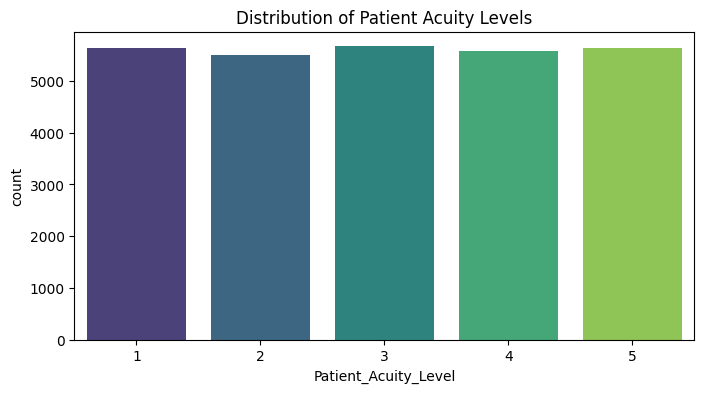

<ipython-input-2-a4fb9ff1bcf3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_of_Day', y='Staff_Available', data=data, palette="coolwarm")


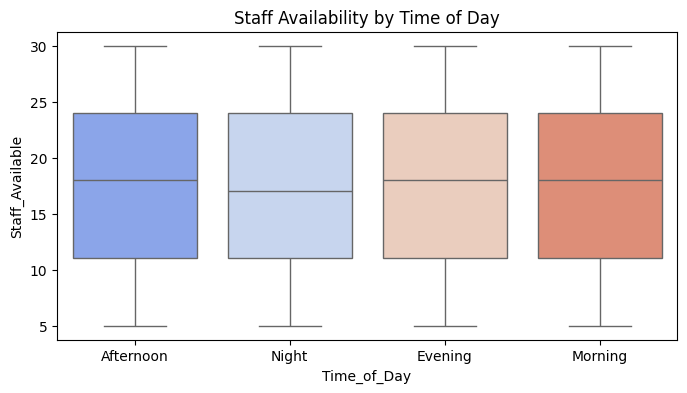

In [2]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Plot distribution of 'Patient_Acuity_Level'
plt.figure(figsize=(8, 4))
sns.countplot(x='Patient_Acuity_Level', data=data, palette="viridis")
plt.title('Distribution of Patient Acuity Levels')
plt.show()

# Visualize 'Staff_Available' against 'Time_of_Day'
plt.figure(figsize=(8, 4))
sns.boxplot(x='Time_of_Day', y='Staff_Available', data=data, palette="coolwarm")
plt.title('Staff Availability by Time of Day')
plt.show()


**Step 3: Data Preprocessing and Feature Engineering**

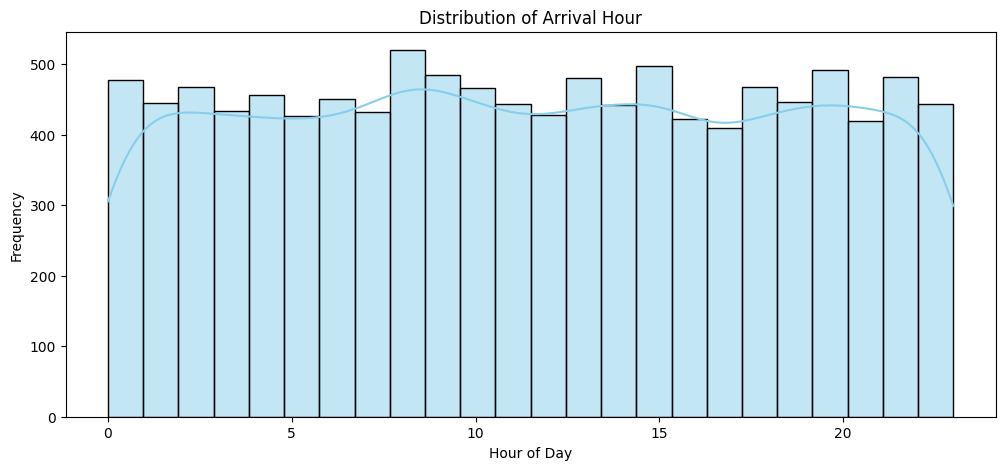

In [3]:
# Convert 'Arrival_Time' to datetime format
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')

# Drop rows with missing 'Arrival_Time' values
data.dropna(subset=['Arrival_Time'], inplace=True)

# Extract date-related features
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Weekday'] = data['Arrival_Time'].dt.weekday
data['Arrival_Month'] = data['Arrival_Time'].dt.month

# Encode 'Time_of_Day' as a numerical feature
time_of_day_mapping = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
data['Time_of_Day'] = data['Time_of_Day'].map(time_of_day_mapping)

# Visualize new features
plt.figure(figsize=(12, 5))
sns.histplot(data['Arrival_Hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Arrival Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


**Step 4: Simulate the Target Variable ('Wait_Time')**

In [4]:
# Simulate 'Wait_Time' since actual data isn't available
data['Wait_Time'] = data['Patient_Acuity_Level'] * np.random.uniform(5, 15, len(data))


**Step 5: Define Features and Target Variable**

In [5]:
# Define features and target variable
X = data[['Arrival_Hour', 'Arrival_Weekday', 'Arrival_Month', 'Time_of_Day', 'Staff_Available', 'Patient_Acuity_Level']]
y = data['Wait_Time']


**Step 6: Split Data into Training and Testing Sets**

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 7: Initialize and Train Multiple Machine Learning Models**

In [7]:
# Initialize models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'SupportVector': SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    # Display results
    print(f"\n{name} Model Results:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")



RandomForest Model Results:
Mean Absolute Error (MAE): 7.752550477283086
Mean Squared Error (MSE): 102.16840949800084
R^2 Score: 0.6511692989890754

GradientBoosting Model Results:
Mean Absolute Error (MAE): 7.508368614369651
Mean Squared Error (MSE): 91.49448935838006
R^2 Score: 0.6876129615960713

LinearRegression Model Results:
Mean Absolute Error (MAE): 7.441685351185816
Mean Squared Error (MSE): 90.08684704540309
R^2 Score: 0.6924190347963985

DecisionTree Model Results:
Mean Absolute Error (MAE): 10.049846863206188
Mean Squared Error (MSE): 188.00569754620415
R^2 Score: 0.35809748246718553

SupportVector Model Results:
Mean Absolute Error (MAE): 7.904585419161793
Mean Squared Error (MSE): 103.6810947074426
R^2 Score: 0.6460045808084645


**Step 8: Visualize Model Comparison**

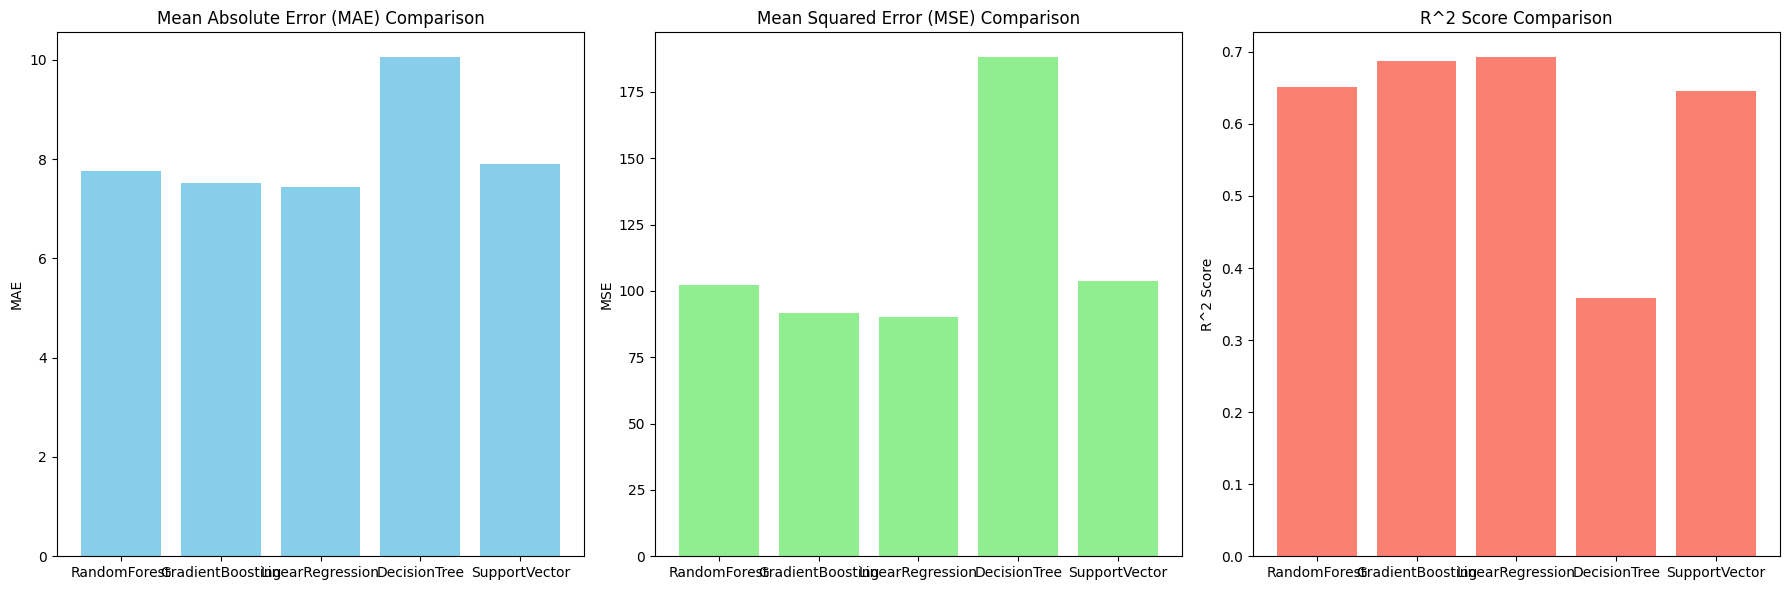

In [8]:
# Extract metric values for plotting
model_names = list(results.keys())
mae_values = [results[model]['MAE'] for model in model_names]
mse_values = [results[model]['MSE'] for model in model_names]
r2_values = [results[model]['R2'] for model in model_names]

plt.figure(figsize=(18, 6))

# Plot MAE comparison
plt.subplot(1, 3, 1)
plt.bar(model_names, mae_values, color='skyblue')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

# Plot MSE comparison
plt.subplot(1, 3, 2)
plt.bar(model_names, mse_values, color='lightgreen')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')

# Plot R^2 score comparison
plt.subplot(1, 3, 3)
plt.bar(model_names, r2_values, color='salmon')
plt.title('R^2 Score Comparison')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()


**Step 9: Save the Best Model Using Pickle**

In [9]:
# Choose the best model based on R^2 score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]

print(f"\nSaving the best model: {best_model_name} with R^2 score of {results[best_model_name]['R2']}")

# Save the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_model.pkl'")



Saving the best model: LinearRegression with R^2 score of 0.6924190347963985
Model saved as 'best_model.pkl'
